In [18]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

## a)

In [19]:
def poisson_process(lam, size):
    x = np.random.poisson(lam, size)
    x[0] = 0
    return np.cumsum(x)

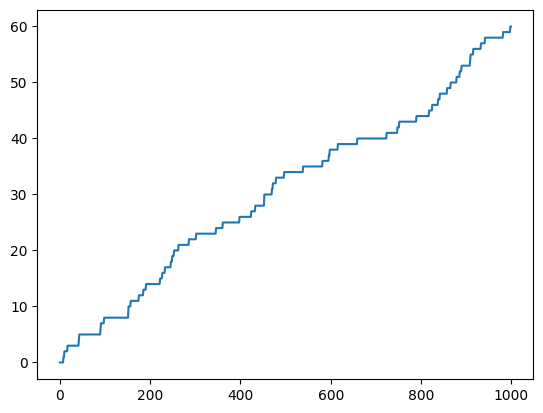

In [20]:
plt.plot(poisson_process(1/15, 1000))
plt.show()

## b)

### I sposób

In [21]:
def wiener_process_v1(time, step=0.01):
    size = int(time / step)
    return np.cumsum(np.random.normal(0, 1, size) * sqrt(step))

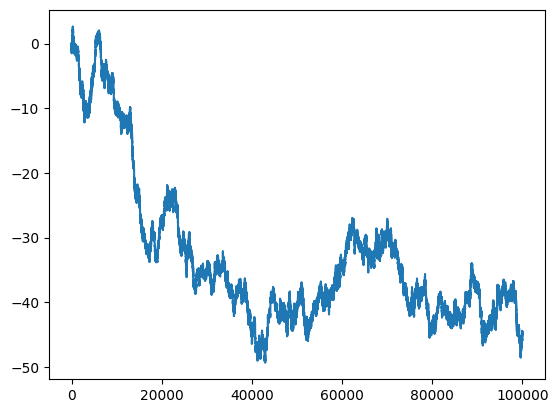

In [22]:
plt.plot(wiener_process_v1(1000, step=0.01))
plt.show()

### II sposób

In [23]:
def cholesky(S):
    n = len(S)
    L = [[0.0] * n for i in range(n)]
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if (i == k):
                L[i][k] = sqrt(S[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (S[i][k] - tmp_sum))
    return L


In [24]:
def create_matrix(n, step):
    m = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            m[i][j] = step * (min(i, j) + 1)
    return m

In [25]:
def wiener_process_v2(time, step=0.01):
    size = int(time / step)

    cov = create_matrix(size, step)
    L = cholesky(cov)
    x = np.random.normal(0, 1, size)  
    
    return L@x

In [26]:
sample_wiener = wiener_process_v2(10)

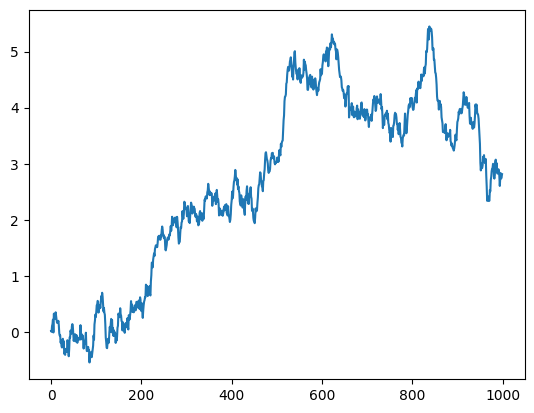

In [27]:
plt.plot(sample_wiener)
plt.show()

## c)

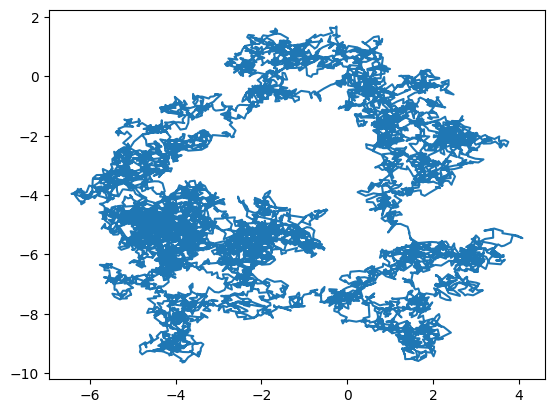

In [28]:
plt.plot(wiener_process_v1(100), wiener_process_v1(100))
plt.show()

## d)

![nazwa](d_notes1.jpg)
![nazwa](d_notes2.jpg)

In [29]:
def correlated_wiener_processes(cor, time=100):
    W1 = wiener_process_v1(time)
    W2 = wiener_process_v1(time)
    
    V1 = cor * W1 + sqrt(1-cor ** 2) * W2

    return V1, W1


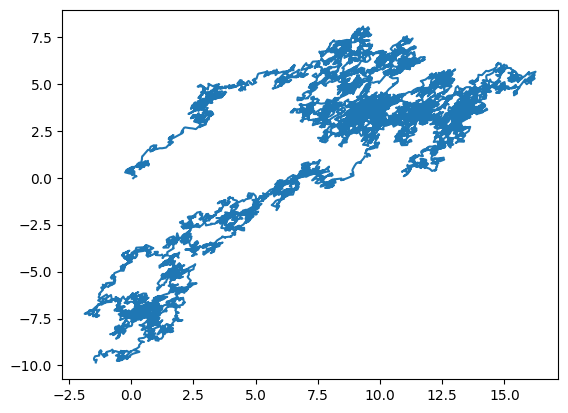

In [30]:
W1, W2 = correlated_wiener_processes(0.5)
plt.plot(W1, W2)
plt.show()

## e)

In [31]:
def generate_mpwl(n):
    res = np.zeros(n)
    u = np.random.uniform(0, 1, n)
    indices = np.arange(1, n+1)

    thresholds = 1/((indices+1) ** (3/2)) 
    res[u < thresholds / 2] = indices[u < thresholds / 2] + 1
    res[u > 1 - thresholds / 2] = -indices[u > 1 - thresholds / 2] -1
    return res

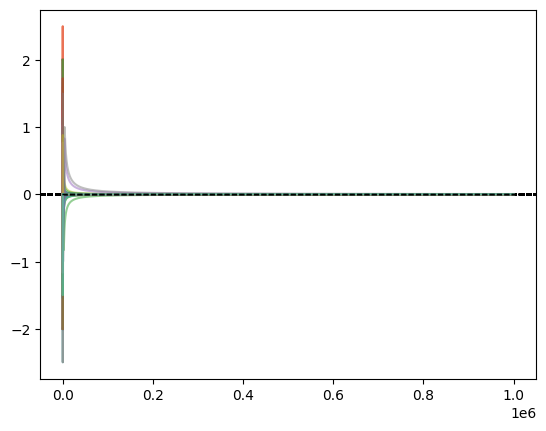

In [32]:
N = 1_000_000
n = 100

for i in range(n):
    plt.plot(np.cumsum(generate_mpwl(N))/np.arange(1, N+1), alpha=0.5)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

In [33]:
def generate_spwl(n):
    res = np.zeros(n)
    u = np.random.uniform(0, 1, n)
    indices = np.arange(1, n+1)

    thresholds = 1/((indices + 1) * np.log(indices + 1)) 
    res[u < thresholds / 2] = indices[u < thresholds / 2] + 1
    res[u > 1 - thresholds / 2] = -indices[u > 1 - thresholds / 2] -1
    return res

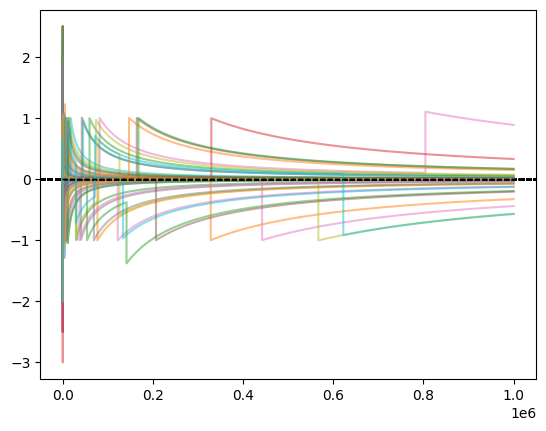

In [34]:
N = 1_000_000
n = 100

for i in range(n):
    plt.plot(np.cumsum(generate_spwl(N))/np.arange(1, N+1), alpha=0.5)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

In [35]:
def generate_no_covergence(n):
    res = np.zeros(n)
    u = np.random.uniform(0, 1, n)
    indices = np.arange(1, n+1)

    thresholds = 1/(indices + 1) 
    res[u < thresholds / 2] = indices[u < thresholds / 2] + 1
    res[u > 1 - thresholds / 2] = -indices[u > 1 - thresholds / 2] -1
    return res

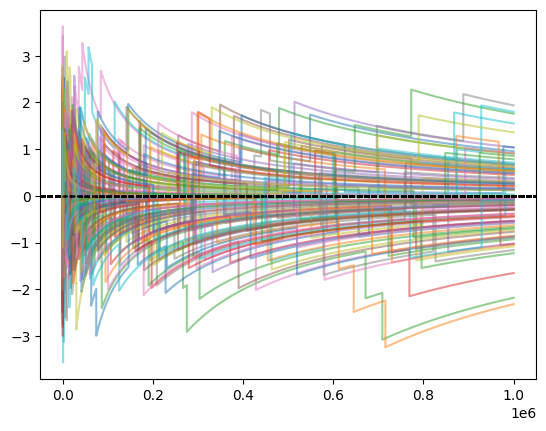

In [36]:
N = 1_000_000
n = 100


for i in range(n):
    plt.plot(np.cumsum(generate_no_covergence(N))/np.arange(1, N+1), alpha=0.5)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

## f) 

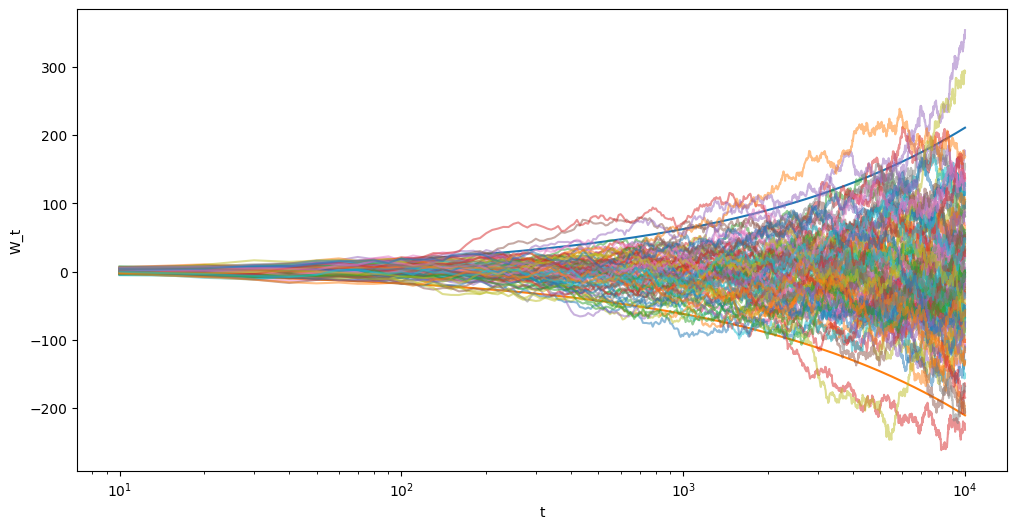

In [37]:
T = 10000  # duże T
n = 1000  # liczba punktów czasowych
t = np.linspace(10, T, n)  # zaczynamy od 10, aby uniknąć log(0)

# Funkcje f±(t)
f_plus = np.sqrt(2 * t * np.log(np.log(t)))
f_minus = -np.sqrt(2 * t * np.log(np.log(t)))

# # Rysowanie wykresu
plt.figure(figsize=(12, 6))
plt.plot(t, f_plus)
plt.plot(t, f_minus)
for i in range(100):
    W = wiener_process_v1(T, step=10)
    plt.plot(t, W, alpha=0.5)
plt.xscale('log')
plt.xlabel('t')
plt.ylabel('W_t')
plt.show()